In [1]:
import numpy as np
import scipy as sp
import torch as th

import os, pdb, sys, json, glob, tqdm
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import h5py

sns.set_style('whitegrid')

sns.set_context('notebook')

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 200
sns.set(context='poster',
        style='ticks',
        font_scale=1,
        rc={'axes.grid':True,
            'grid.color':'.9',
            'grid.linewidth':0.75})
%load_ext autoreload
%autoreload 2

root = '/home/ubuntu/ext_vol'
import sys
sys.path.insert(0, f'{root}/inpca')

from utils import get_data, get_idx, triplot, plotly_3d

In [2]:
import plotly.graph_objects as go
import numpy as np
import plotly.offline as pyo
import pandas as pd
pyo.init_notebook_mode()
from matplotlib.lines import Line2D    
from utils import CDICT_M, plot_explained_var

In [6]:
fn = 'allcnn_geod'
k = 'yh'

didx = th.load(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/didx_{fn}.p')
r = th.load(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/r_{k}_{fn}.p')

In [7]:
from utils import explained_stress
r['fn'] = np.sqrt(r['fn'])
explained_stress(r)

array([0.7820952 , 0.85263246, 0.87428063, 0.8969122 , 0.9249038 ,
       0.9538949 , 0.9589394 , 0.9611095 , 0.9631469 , 0.9647574 ,
       0.96596974, 0.96712977, 0.968067  , 0.9689586 , 0.9697236 ,
       0.970466  , 0.9712152 , 0.9719249 , 0.97264534, 0.97333276,
       0.974028  , 0.9747058 , 0.9753684 , 0.97600335, 0.97663254,
       0.97724116, 0.9778221 , 0.97840905, 0.9789826 , 0.9795504 ,
       0.980082  , 0.9806204 , 0.9811679 , 0.9817074 , 0.9822414 ,
       0.98275566, 0.9832643 , 0.98376876, 0.98425907, 0.9846832 ,
       0.9850974 , 0.98548234, 0.9858504 , 0.9862001 , 0.9865235 ,
       0.9868436 , 0.987153  , 0.9874701 , 0.98775643, 0.98802465],
      dtype=float32)

In [8]:
r['e']

array([4810.5854 , -791.1873 ,  378.9854 ,  354.69577,  348.10333,
        292.1766 ,  103.34926], dtype=float32)

In [117]:
ii = list(didx[(didx.isinit==False) & (didx.iseed==0) & (didx.seed>0)].index)
ii_normal = list(didx[didx.corner=='normal'].index)
with h5py.File(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/w_{k}_{fn}.h5', 'r') as f:
    w = f['w'][ii, :][:, ii]

In [118]:
didx.loc[ii, 'count'] = np.sum(w < 0.12, axis=1)

In [20]:
didx = didx[(didx.isinit==False) & (didx.iseed>=0)]

In [21]:
r['xp'] = r['xp'][list(didx.index), :]

In [ ]:
d2 = d2[d2.isinit==False]

In [ ]:
didx=didx.merge(d2, how='left', on=['seed','iseed', 't','m','aug', 'bs', 'err','verr','wd', 'opt','lr'])

In [ ]:
cdict = {'0.0':'#690c0d', '1.0':'#690c0d', '2.0':'#690c0d', 'nan':'#e41a1c'}

In [ ]:
cols = ['seed','iseed', 'm','aug', 'bs', 'wd', 'opt','lr']
dd = didx[didx['count'] > 10000]

In [340]:
(dd.iloc[[ii[-1] for ii in dd.groupby(cols).indices.values()]].t)

201      59.0
468     500.0
125     249.0
638     249.0
809     249.0
903      95.0
1494    500.0
1322    249.0
1054     55.0
1908     53.0
1836    500.0
1664    249.0
2245     43.0
2178    500.0
2519    249.0
2823    173.0
2690    249.0
2940     65.0
3203    249.0
3271     43.0
3545    249.0
3716    249.0
3960     53.0
3780     35.0
4127     45.0
4391    231.0
4571    249.0
4987     55.0
4644     53.0
4913    249.0
Name: t, dtype: float64

In [97]:
dd.iloc[[ii[0] for ii in dd.groupby(cols).indices.values()]].lam_yh

176     0.025925
350     0.044680
9       0.084201
524     0.151672
689     0.019335
865     0.095406
1382    0.149307
1208    0.165382
1034    0.067676
1889    0.074686
1720    0.072989
1549    0.068698
2233    0.081968
2058    0.074348
2405    0.137593
2750    0.112720
2576    0.092935
2919    0.101896
3093    0.116720
3262    0.148102
3433    0.134927
3603    0.164861
3945    0.142036
3775    0.161485
4116    0.129368
4288    0.094422
4459    0.118741
4963    0.012862
4625    0.046724
4798    0.089952
Name: lam_yh, dtype: float64

In [39]:
didx['color'] = np.clip(didx.t, 0, 300)

In [119]:
len(didx.iloc[ii].groupby(['t']).indices[0])

10

[None]

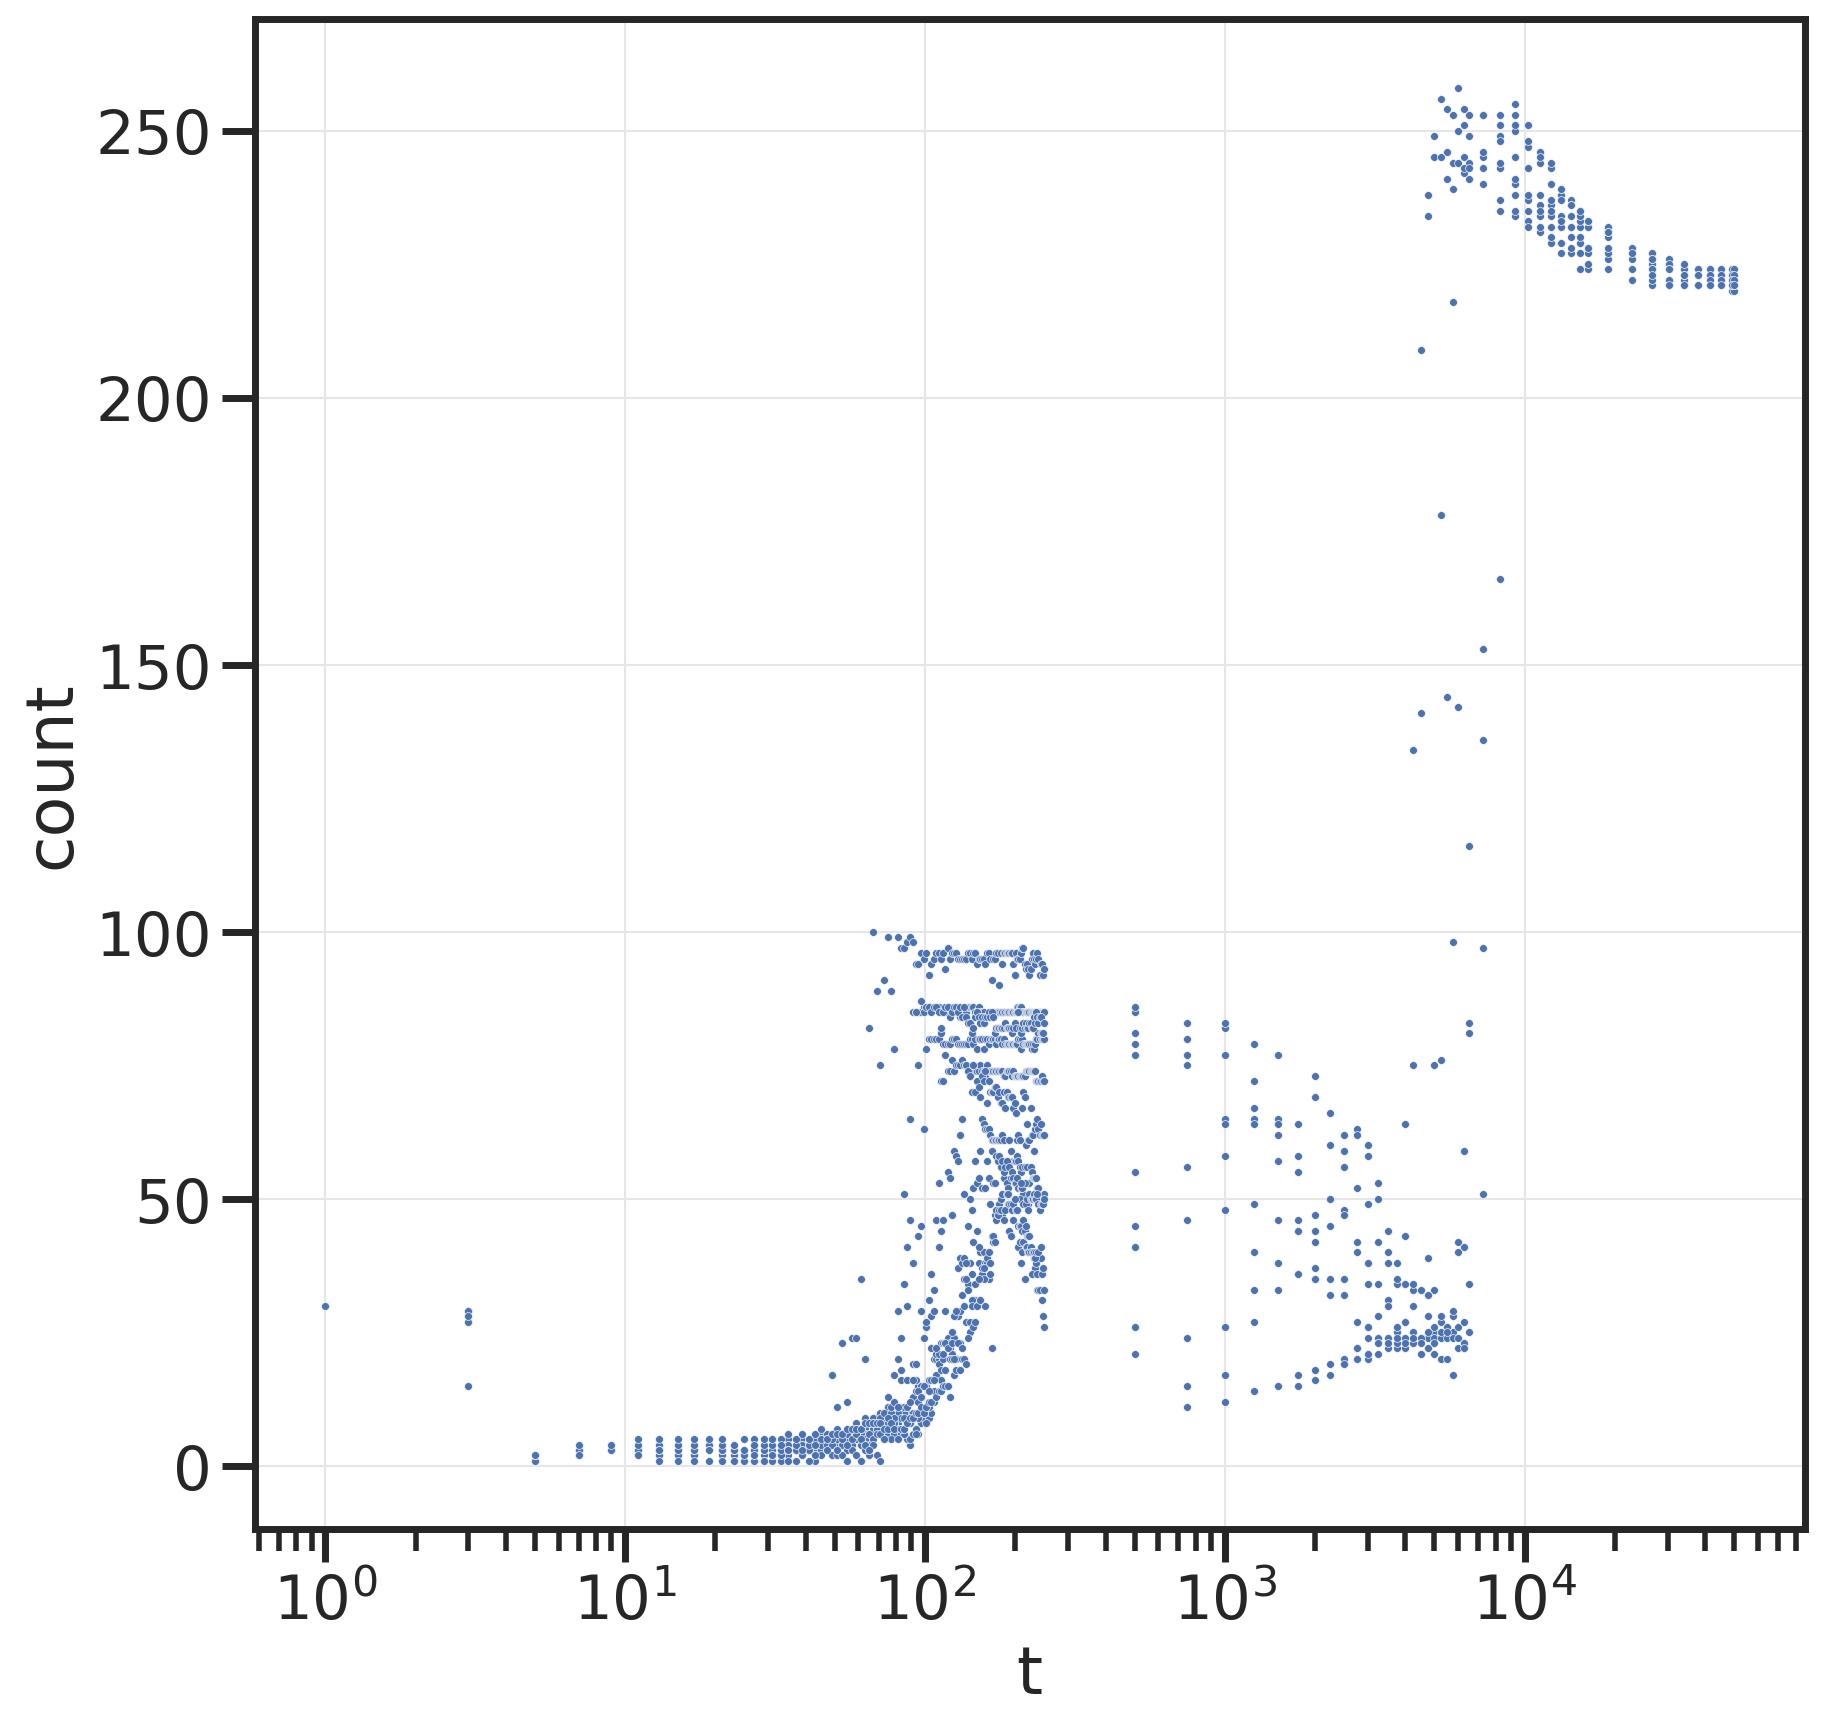

In [120]:
# for s in range(42,52):
ax=sns.scatterplot(data=didx.iloc[ii].reset_index(), x='t', y='count', 
                   s=8)
ax.set(xscale='log')

In [127]:
# + \ list(didx[(didx.isinit==True) & (didx.iseed==0) & (didx.t==50000)].index)+\
# list(didx[(didx.m=='0geodesic') & (didx.t==1)].index)
# r['xp'] = r['xp'][ii, :]
fig = plotly_3d(dc=didx.iloc[ii].reset_index(drop=True), r=r,
          opacity=0.5,
          color_axis=True,
          dims=[1,2,3],
          ne=3,
          color='count', 
            discrete_c=False,
          colorscale='RdBu',
          legend=True,
          cols=['seed',  'm', 'opt', 't',  'iseed', 'isinit', 'err', 'verr', 'count',
                'bs', 'aug', 'lr', 'wd'],
          xrange=[-2,2],
          yrange=[-2,2],
          zrange=[-2, 2]
          )
fig.show()

[4810.5854  -791.1873   378.9854   354.69577  348.10333  292.1766
  103.34926]


In [22]:
di = th.load('/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/didx_merged_allcnn.p')

In [32]:
didx = th.load('/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/didx_yh_(0,)_(0,).p')['dr'].reset_index(drop=True)

In [34]:
w = th.load('/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/w_yh_(0,)_(0,).p')

In [285]:
di = list(di[(di.corner=='normal') & (di.t==0)].index)

In [42]:
from eigvals import main

In [112]:
main(key='yh',
    load_fn="merged_allcnn", save_fn="corner2_only_with_normal", 
     save_w=True,
     cond="(iseed==2) or (m=='0geodesic') or (m=='geodesic') or (m=='tocorner0_geodesic') or ((corner=='normal') & (m=='allcnn') & (opt=='sgd') & (aug=='none') & (bs==200) & (lr==0.1) & (wd==0.0))", 
     cond_didx='/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/didx_merged_allcnn.p',
     root='/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/'
    )

loading w from /home/ubuntu/ext_vol/inpca/inpca_results_all/corners/w_yh_merged_allcnn.h5
w loaded, t:  8.941063165664673
(3150, 3150)
centering
centered, t:  0.017711400985717773
getting evals
t:  1.874201774597168
projecting
projected, t:  1.9650983810424805


In [11]:
fn = 'allcnn_geod'
k = 'yh'

didx = th.load(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/didx_{fn}.p')
r = th.load(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/r_{k}_{fn}.p')

In [ ]:
# + \ list(didx[(didx.isinit==True) & (didx.iseed==0) & (didx.t==50000)].index)+\
# list(didx[(didx.m=='0geodesic') & (didx.t==1)].index)
fig = plotly_3d(dc=didx.reset_index(drop=True), r=r,
          opacity=0.5,
          color_axis=True,
          dims=[1,2,3],
          ne=3,
          color='iseed', 
            discrete_c=True,
          colorscale='RdBu',
          legend=True,
          cols=['seed',  'm', 'opt', 't',  'iseed', 'isinit', 
                'bs', 'aug', 'lr', 'wd'],
          xrange=[-1,1],
          yrange=[-1,1],
          zrange=[-1, 1]
          )
fig.show()

In [11]:
ii = didx[didx.seed.isin([0,44,46,47,48,50])].index
didx = didx.iloc[ii].reset_index(drop=True)
r['xp'] = r['xp'][ii, :]

In [12]:
for seed in [44, 46, 47, 48, 50]:
    didx.loc[didx.seed==seed, 'm'] = f'allcnn{seed}'
didx.loc[didx.isinit==True, 'm'] = 'tocorner'

[None, None]

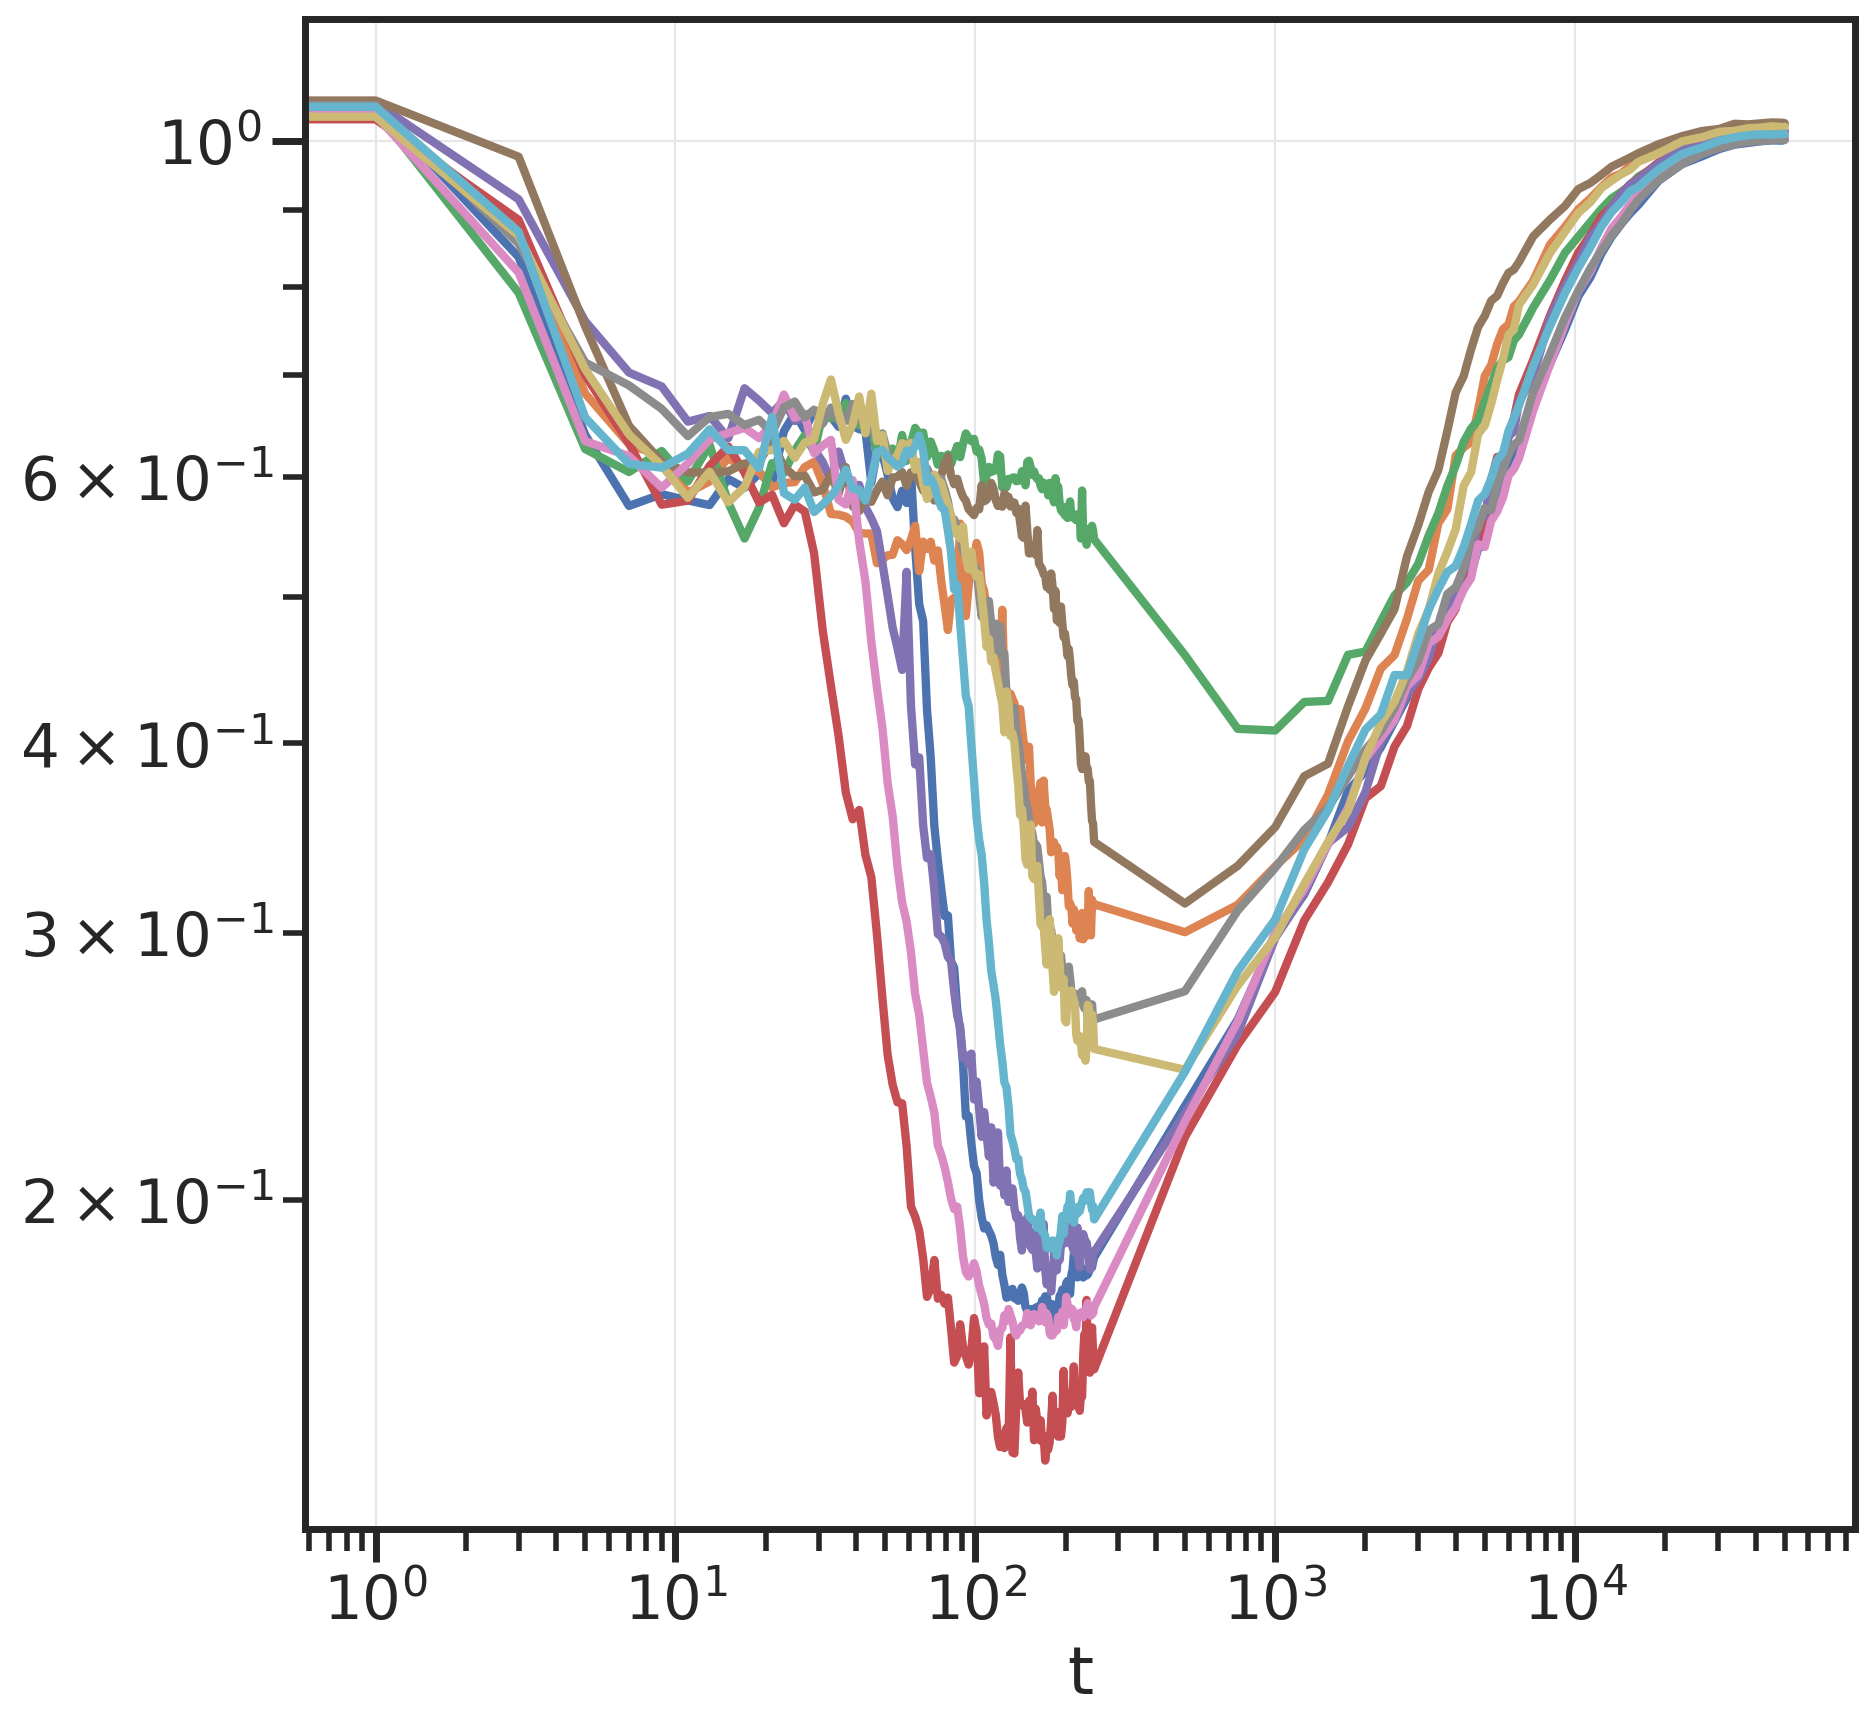

In [115]:
i0 = [200]
f, ax=plt.subplots()
for seed in range(42, 52):
    ii = list(didx[(didx.seed == seed)&(didx.iseed==2)&(didx.isinit==False)].index)
    w = th.load(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/w_{k}_{fn}.p')
    wi = w[i0, :][:, ii]
    sns.lineplot(x=didx.iloc[ii].t, y=wi[0, :], ax=ax, label=seed, legend=False)
ax.set(yscale='log', xscale='log')

[None, None]

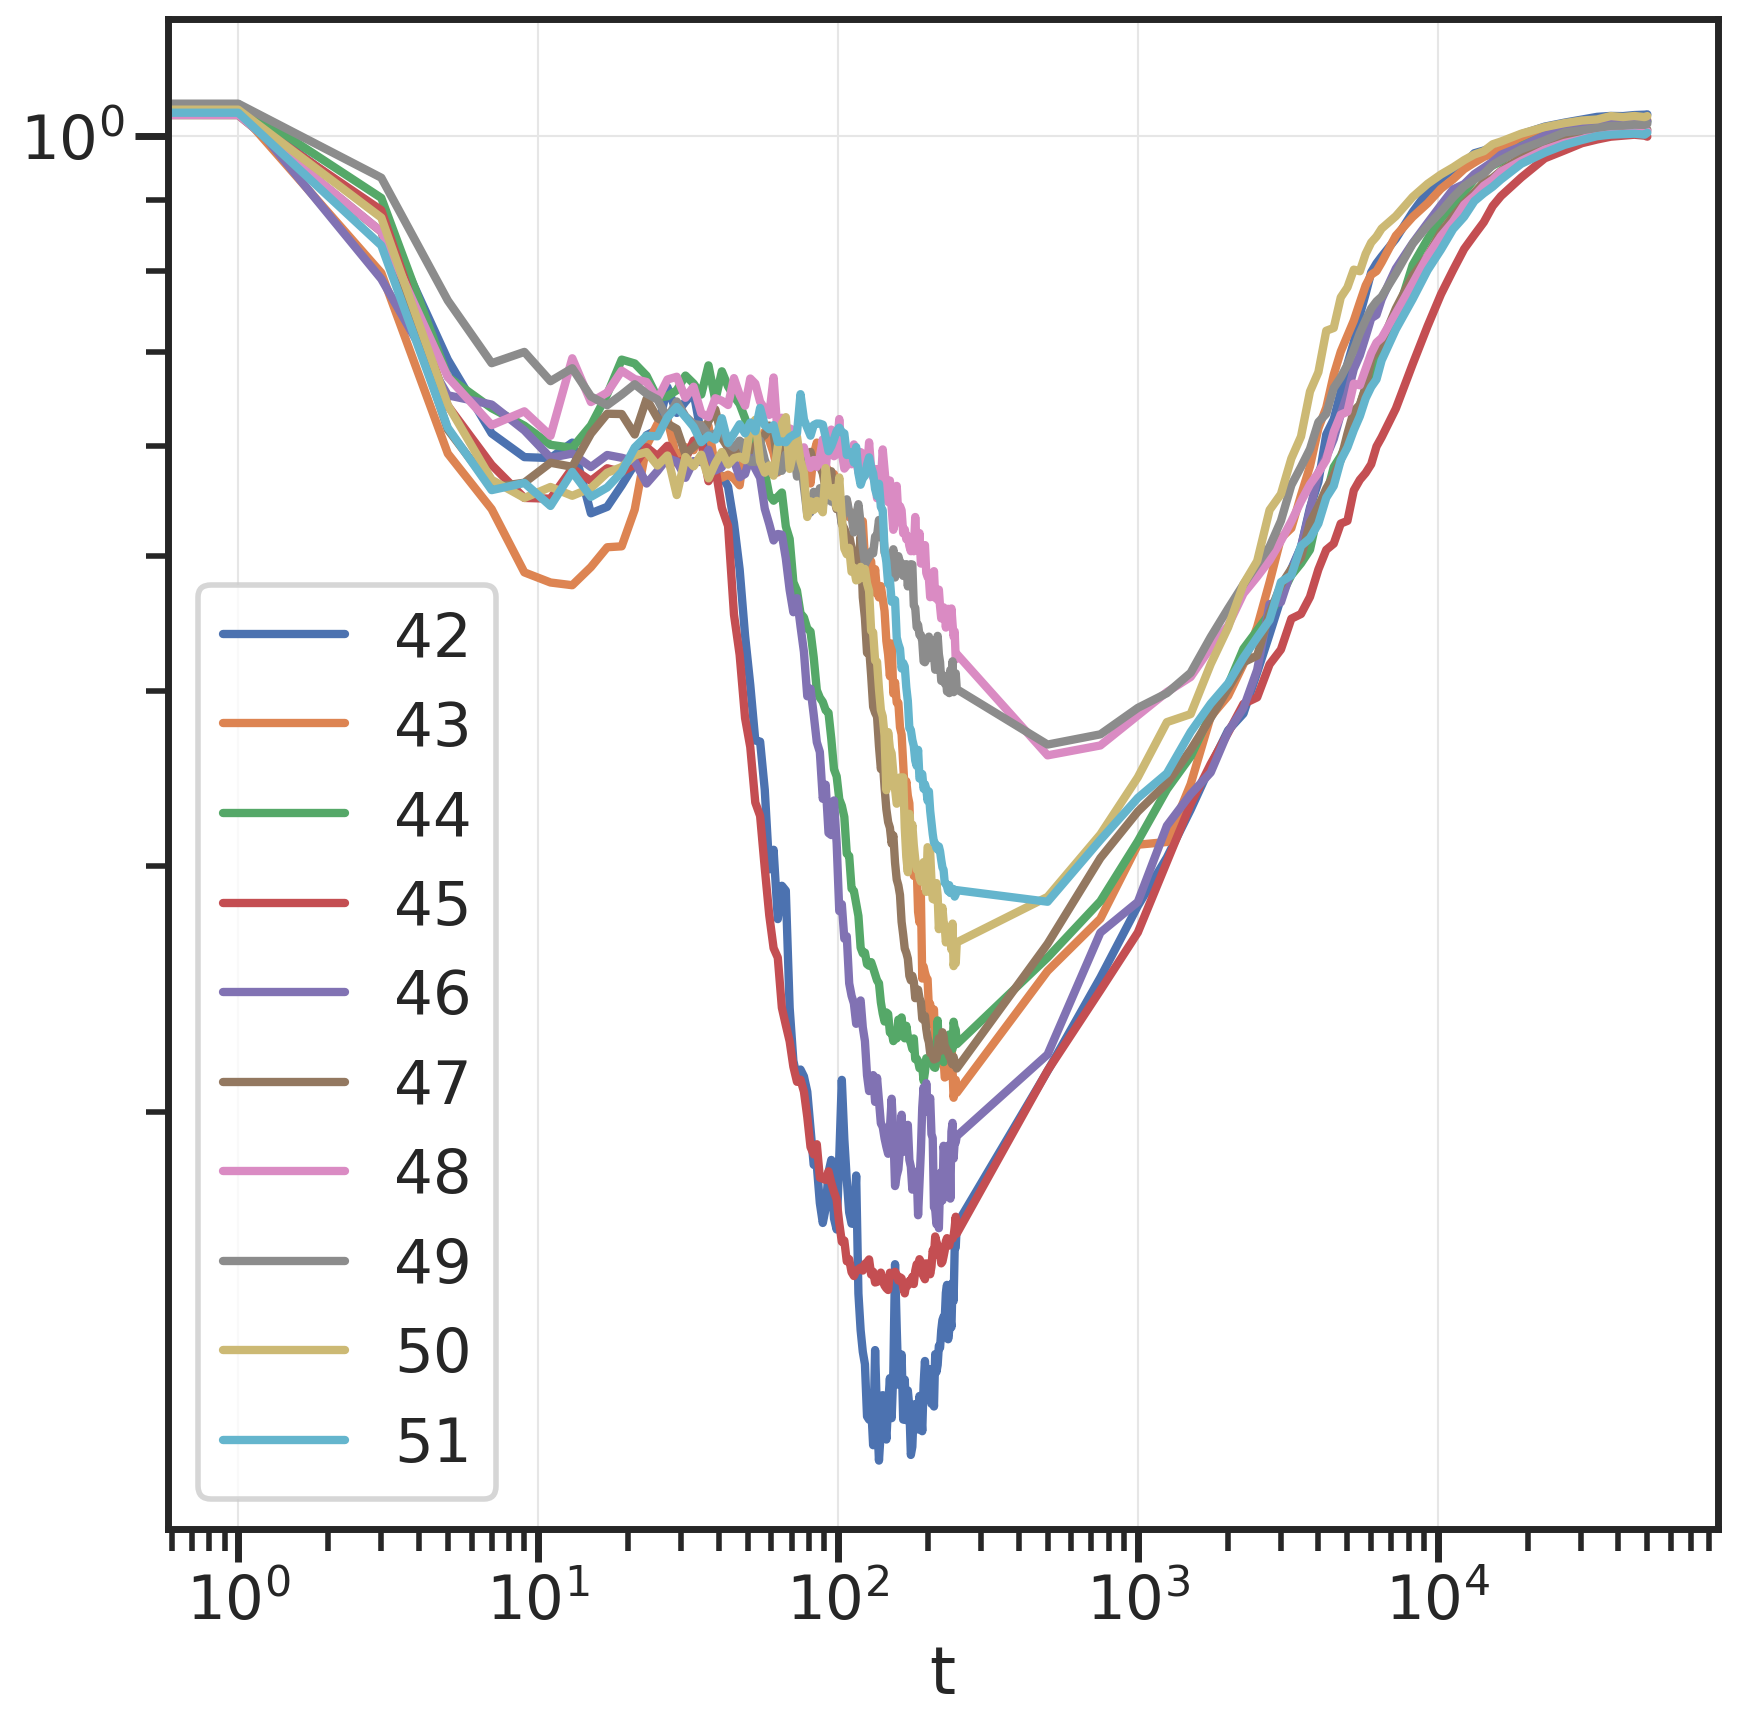

In [107]:
i0 = [200]
f, ax=plt.subplots()
for seed in range(42, 52):
    ii = list(didx[(didx.seed == seed)&(didx.iseed==1)&(didx.isinit==False)].index)
    w = th.load(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/w_{k}_{fn}.p')
    wi = w[i0, :][:, ii]
    sns.lineplot(x=didx.iloc[ii].t, y=wi[0, :], ax=ax, label=seed)
ax.set(yscale='log', xscale='log')

In [ ]:
# + \ list(didx[(didx.isinit==True) & (didx.iseed==0) & (didx.t==50000)].index)+\
# list(didx[(didx.m=='0geodesic') & (didx.t==1)].index)
fig = plotly_3d(dc=didx.reset_index(drop=True), r=r,
          opacity=0.5,
          color_axis=True,
          dims=[1,2,3],
          ne=3,
          color='seed', 
            discrete_c=True,
          colorscale='RdBu',
          legend=True,
          cols=['seed',  'm', 'opt', 't',  'iseed', 'isinit', 'err_x', 'verr_x',
                'bs', 'aug', 'lr', 'wd'],
          xrange=[-2,2],
          yrange=[-2,2],
          zrange=[-2, 2]
          )
fig.show()

In [23]:
# + \ list(didx[(didx.isinit==True) & (didx.iseed==0) & (didx.t==50000)].index)+\
# list(didx[(didx.m=='0geodesic') & (didx.t==1)].index)
fig = plotly_3d(dc=didx.reset_index(drop=True), r=r,
          opacity=0.5,
          color_axis=True,
          dims=[1,2,3],
          ne=3,
          color='seed', 
            discrete_c=True,
          colorscale='Set1',
          legend=True,
          cols=['seed',  'm', 'opt', 't',  'iseed', 'isinit',
                'bs', 'aug', 'lr', 'wd'],
          xrange=[-2,2],
          yrange=[-2,2],
          zrange=[-2, 2]
          )
fig.show()

{43: '#e41a1c', 44: '#377eb8', 45: '#4daf4a', 46: '#984ea3', 47: '#ff7f00', 48: '#ffff33', 49: '#a65628', 50: '#f781bf', 51: '#999999'}
[431.5391   169.42827  -91.18676   83.64273  -58.670788  44.854393
  31.587725]


In [155]:
didx['seed'] = didx.seed.astype(str)
didx['model'] = didx[['m', 'seed']].apply('-'.join, axis=1)
didx.loc[didx.isinit==True, 'model'] = 'tocorner'

In [191]:
didx[didx.m=='0geodesic']

index_x  seed  iseed          m        opt         t    err_x isinit  \
0         0     0    NaN  0geodesic  0geodesic  0.000000  1.00000    NaN   
1         1     0    NaN  0geodesic  0geodesic  0.010101  1.00000    NaN   
2         2     0    NaN  0geodesic  0geodesic  0.020202  1.00000    NaN   
3         3     0    NaN  0geodesic  0geodesic  0.030303  1.00000    NaN   
4         4     0    NaN  0geodesic  0geodesic  0.040404  1.00000    NaN   
..      ...   ...    ...        ...        ...       ...      ...    ...   
95       95     0    NaN  0geodesic  0geodesic  0.959596  0.09826    NaN   
96       96     0    NaN  0geodesic  0geodesic  0.969697  0.09826    NaN   
97       97     0    NaN  0geodesic  0geodesic  0.979798  0.09826    NaN   
98       98     0    NaN  0geodesic  0geodesic  0.989899  0.09826    NaN   
99       99     0    NaN  0geodesic  0geodesic  1.000000  0.09826    NaN   

    verr_x  bs aug  lr  wd corner  index_y  err_y  verr_y  
0      1.0  na  na  na  na    NaN      NaN    NaN     NaN  
1      1.0  na  na  na  na    NaN      NaN    NaN     NaN  
2      1.0  na  na  na  na    NaN      NaN    NaN     NaN  
3      1.0  na  na  na  na    NaN      NaN    NaN     NaN  
4      1.0  na  na  na  na    NaN      NaN    NaN     NaN  
..     ...  ..  ..  ..  ..    ...      ...    ...     ...  
95     1.0  na  na  na  na    NaN      NaN    NaN     NaN  
96     1.0  na  na  na  na    NaN      NaN    NaN     NaN  
97     1.0  na  na  na  na    NaN      NaN    NaN     NaN  
98     1.0  na  na  na  na    NaN      NaN    NaN     NaN  
99     1.0  na  na  na  na    NaN      NaN    NaN     NaN  

[100 rows x 17 columns]

In [29]:
cdict = {l:[i] for (i,l) in enumerate(list(didx.m.unique())[3:])}

In [44]:
colors =  plt.get_cmap('rocket', 12).colors[5:11]
cdict = {'tocorner':colors[0]}
for (i, seed) in enumerate([44, 48, 47,50,46]):
    cdict[f'allcnn{seed}'] = colors[i+1]

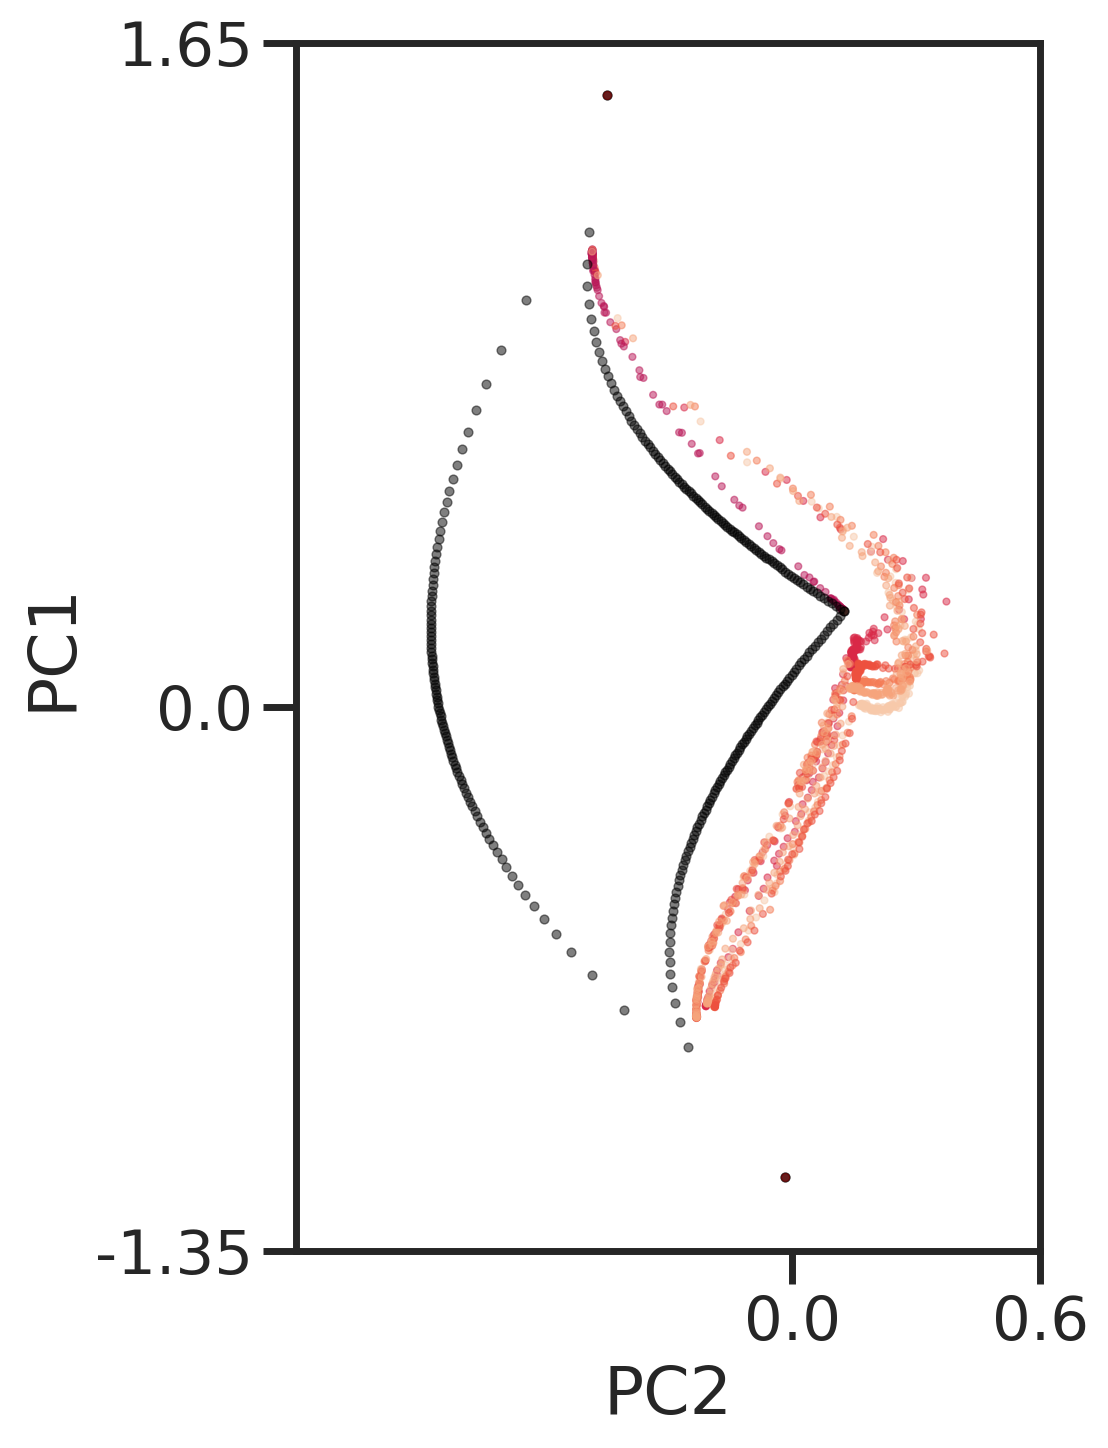

In [49]:
emph = list(didx[didx.m.isin(['0geodesic', 'geodesic', 'tocorner0_geodesic'])].index)
# tocorner = list(didx[didx.m.isin(['tocorner'])].index)
# cdict = {l: '#e41a1c' for (i,l) in enumerate(didx.m.unique())}
f, gs = triplot(didx, r,
                emph = {'geodesic': emph, 'p01':[0], 'ps':[99]},
                empsize={'geodesic':10, 'p01':8, 'ps':8},
                empcolor={'geodesic':'black'},
                ckey='m', 
                discrete_c=True, 
                s=6,
                cdict=cdict,
                grid_ratio=[5,3], grid_size=0.3, centers=[0.15, -0.3],
            )

In [47]:
f.savefig('allcnn_one_corner_.pdf', bbox_inches='tight')

<AxesSubplot:xlabel='dims', ylabel='lam'>

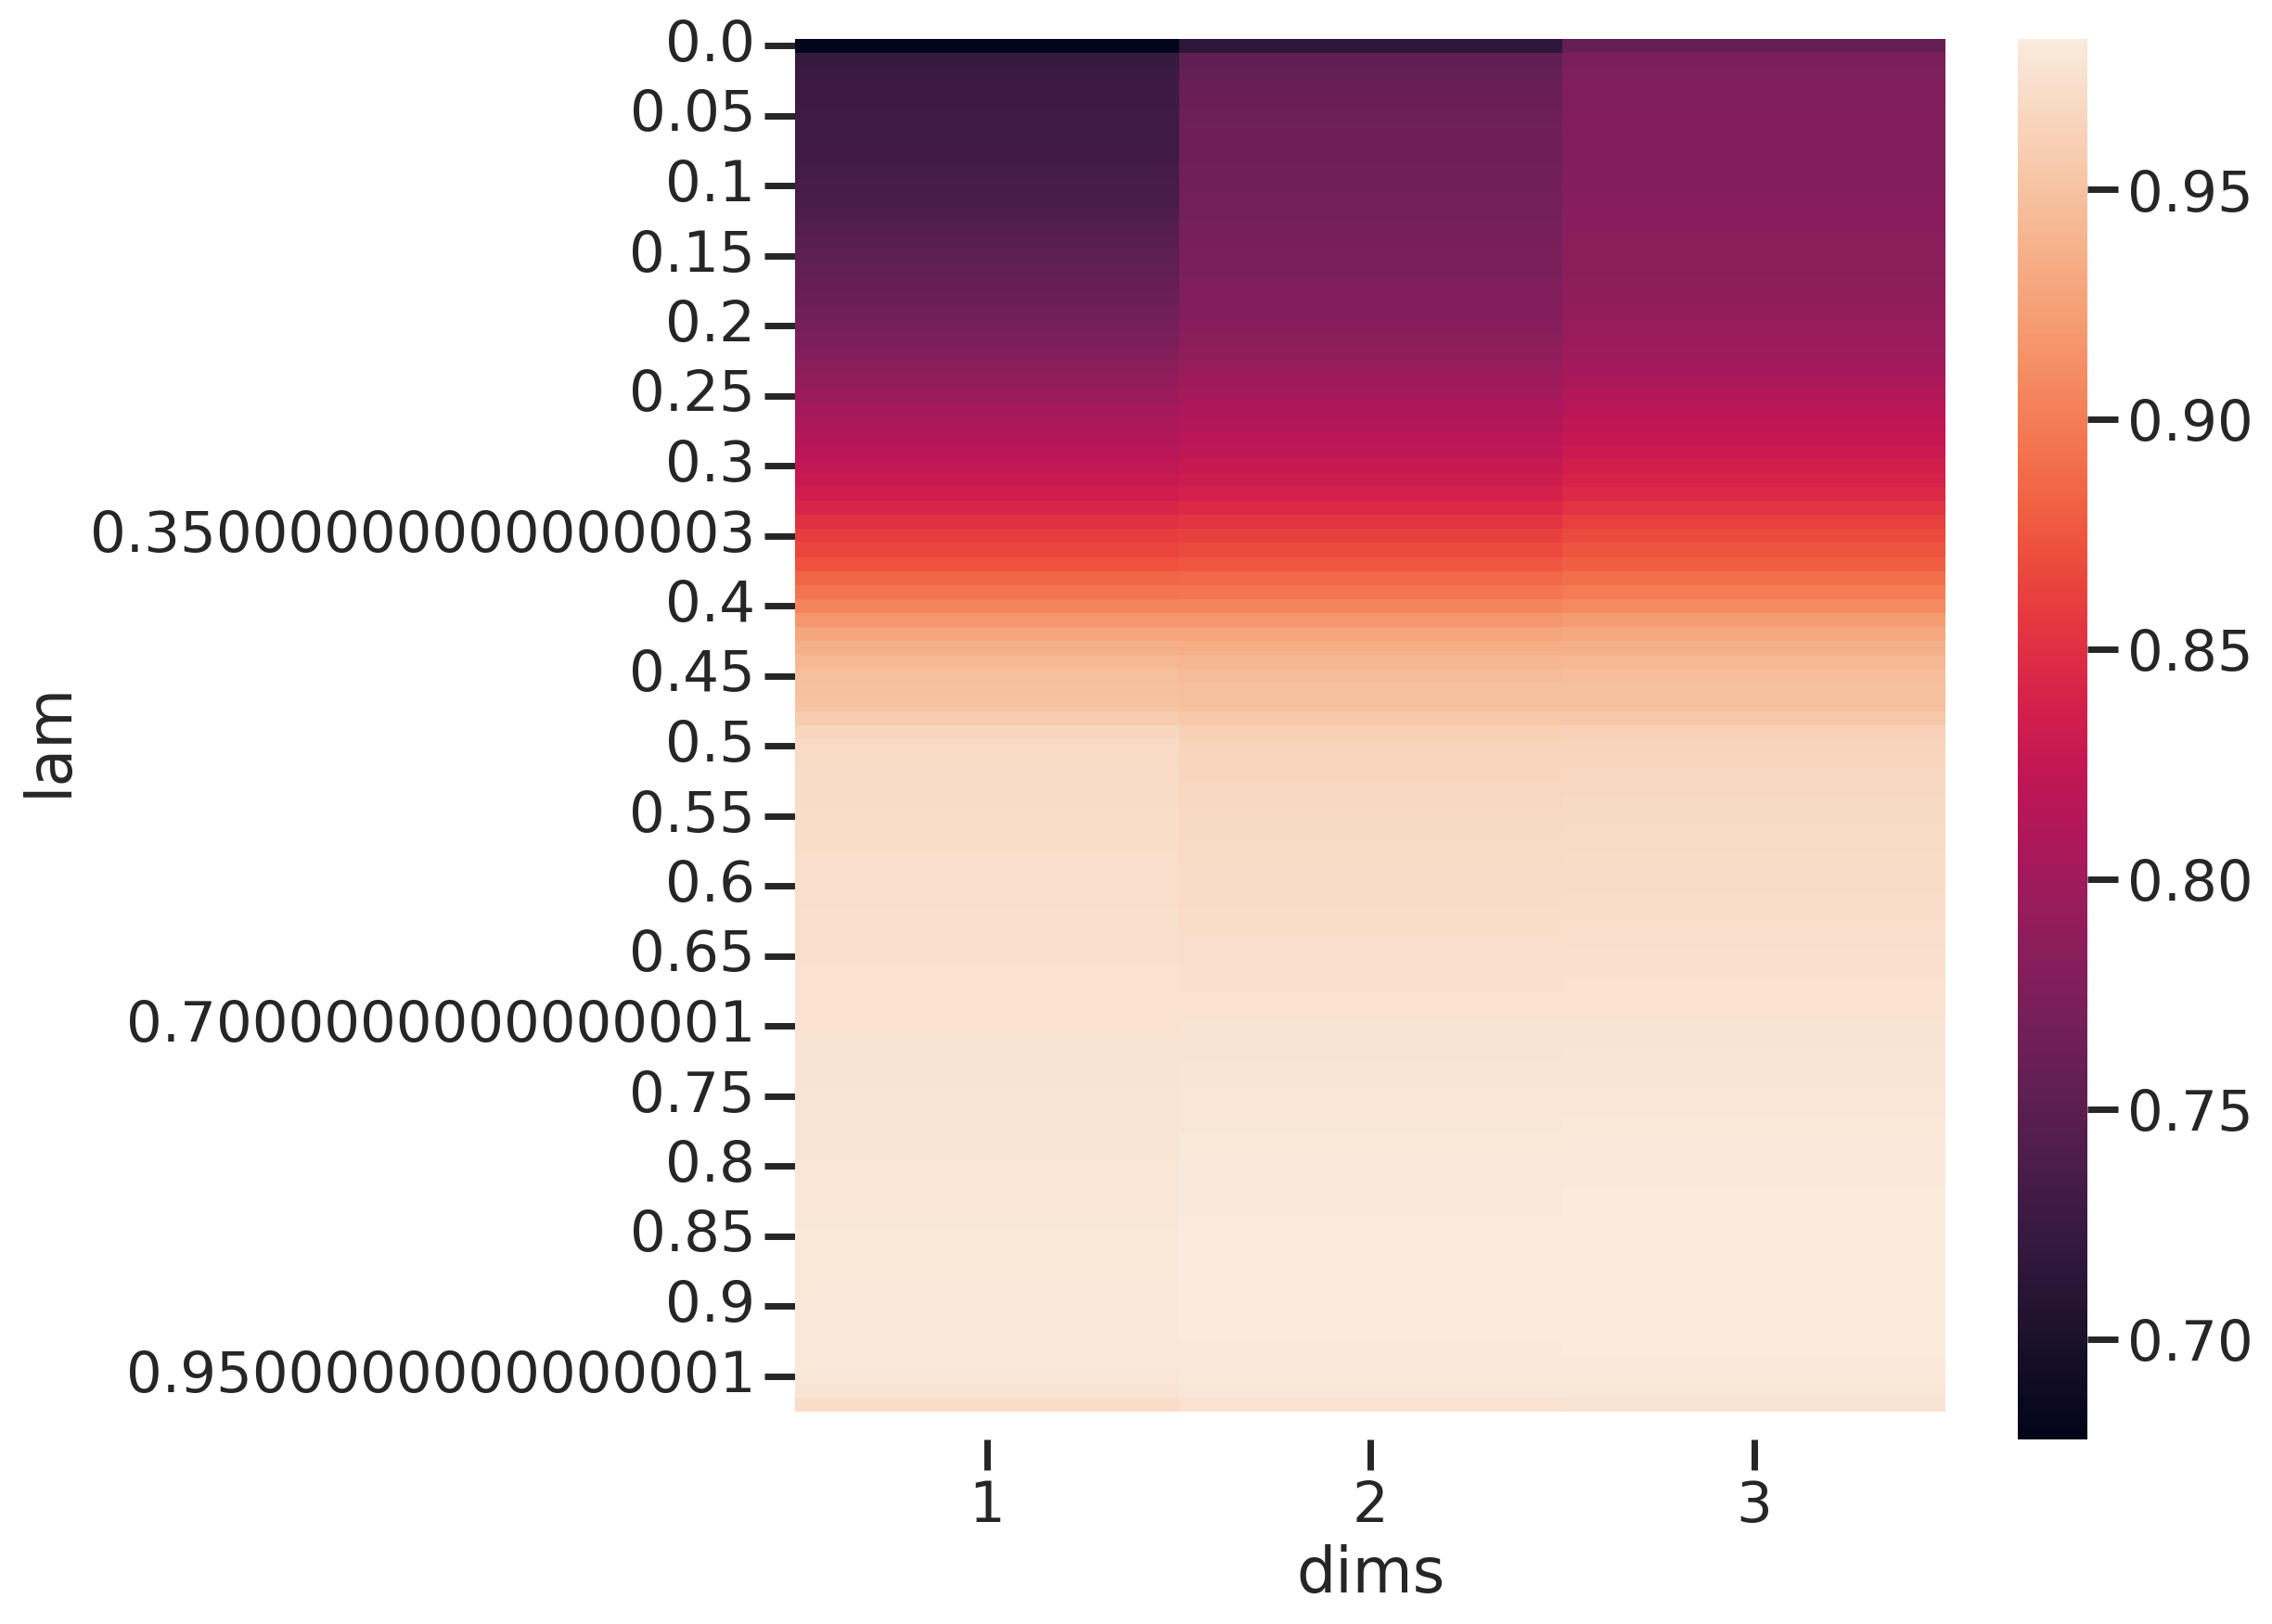

In [127]:
from utils import dinpca
with h5py.File(f'/home/ubuntu/ext_vol/inpca/inpca_results_all/corners/w_yh_noinit_all.h5', 'r') as f:
    w = f['w'][:]
dmean = w.mean(0, keepdims=True)
w = w - dmean
w = w - w.mean(1, keepdims=True)
w = w*(-0.5)
values = []
for i in np.linspace(0, 0.99, 100):
    ii = list(didx[didx.lam_yh>i].index)
    wi = w[ii, :][:, ii]
    for j in range(1, 4):
        values.append(
            dict(lam=i,
            dims=j,
            es=1-np.linalg.norm(r['xp'][ii, :j] @ np.diag(np.sign(r['e'][:j])) @ r['xp'][ii, :j].T - wi ) / np.linalg.norm(wi))
        )
sns.heatmap(data=values.pivot(index='lam', columns='dims', values='es'))

In [123]:
values = pd.DataFrame(values)